#Campus Recruitment Prediction With Machine Learning for MBA Students


 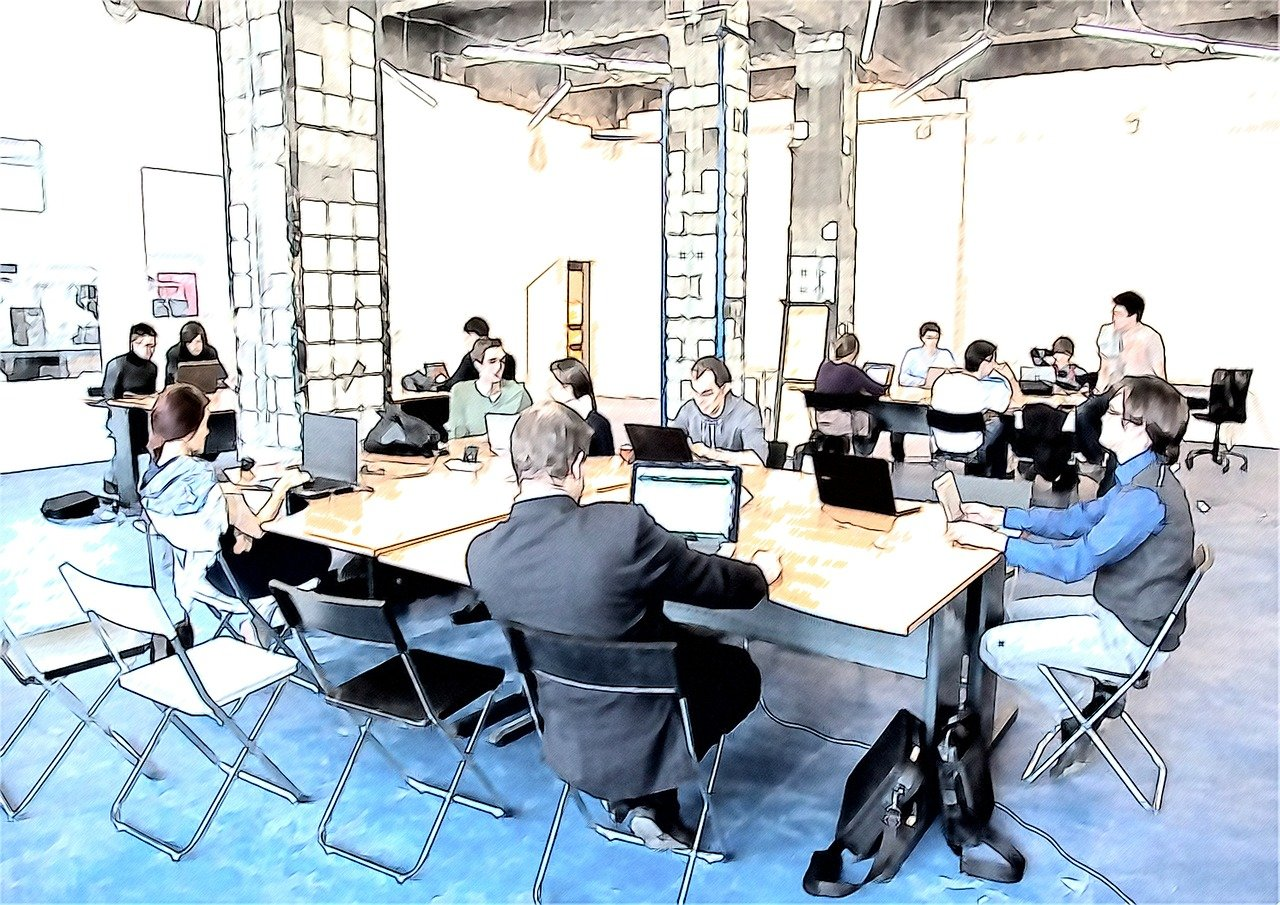

**Student Name:** <br> Dinuk P.D<br>
**Registration Number:** <br> EG/2020/3901

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [118]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Data Loading

In [119]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
df = pd.read_csv('Placement_Data_Full_Class.csv')
# Print the first five rows of the loaded dataframe
df.head()
# Your code goes here

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [120]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df.drop('sl_no', axis=1, inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis (EDA)

In [121]:
# Identify the shape of the loaded dataframe

# Your code goes here
df.shape

(215, 14)

In [122]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**
#### Categorical<br>
1. Gender<br>
2. ssc_b<br>
3. hsc_b<br>
4. hsc_s<br>
5. degree_t<br>
6. wortex<br>
7. specialization<br>
8. status<br>
#### Numerical<br>
1. ssc_p<br>
2. hsc_p<br>
3. degree_p<br>
4. etest_p<br>
5. mba_p<br>
6. salary<br>


In [123]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:** We are going to split the dataset into train and test sets and utilize only the train set for the visualizations because we are going to use the test set to evaluate the performance of the model. If we use the test set for visualization, we will be biasing the model towards the test set and the model will not be able to generalize well.

In [124]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well
from sklearn.model_selection import train_test_split
X = df.drop('status', axis=1)
Y = df['status']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [125]:
# Print number of training data points
x_train.shape
# Your code goes here

(172, 13)

In [126]:
# Print number of testing data points
x_test.shape
# Your code goes here

(43, 13)

c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


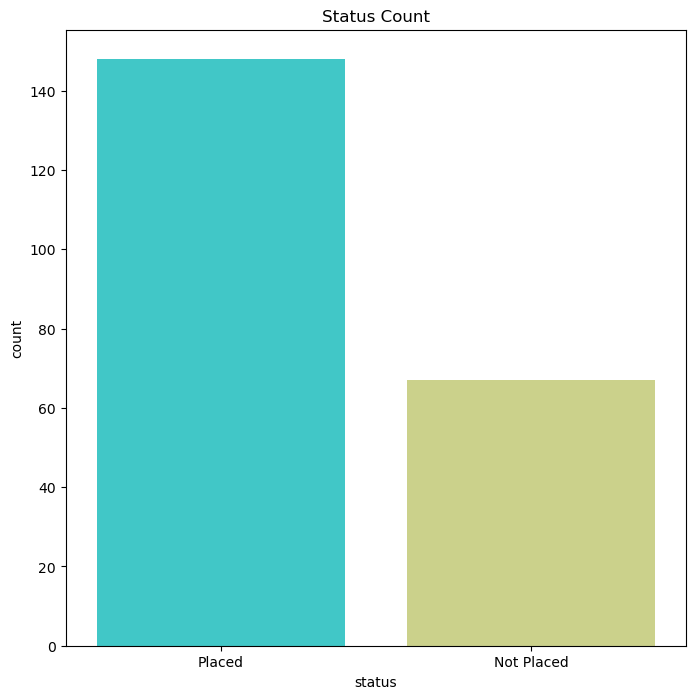

In [127]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
plt.figure(figsize=(8,8))
sns.countplot(x=df['status'], data=df,palette='rainbow')
plt.title('Status Count')
plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
1. <br> Data imbalance can cause the model to be biased towards the majority class. <br>
2. <br> The model will have poor performance on the minority class. <br>
3. <br> The model will have poor generalization performance on the test set. <br>



c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

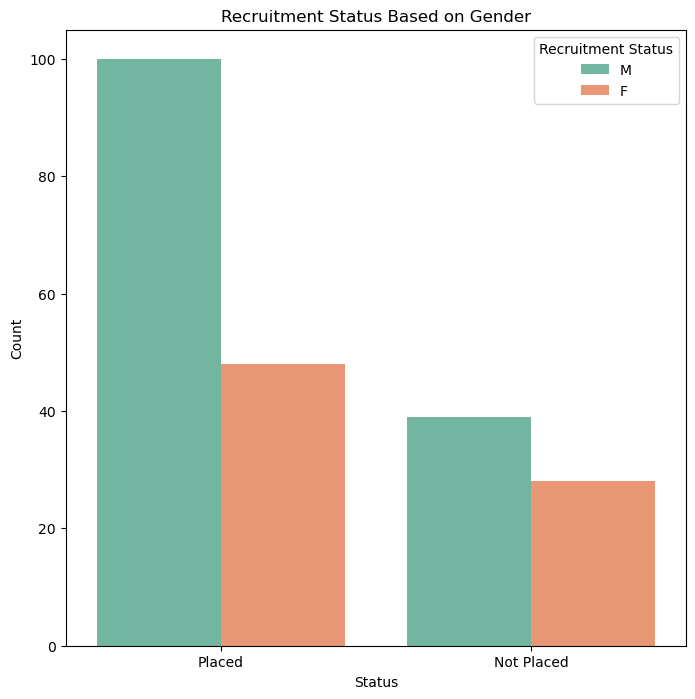

In [128]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here
plt.figure(figsize=(8,8))
sns.countplot(x=df['status'], hue=df['gender'], data=df, palette="Set2")
plt.title("Recruitment Status Based on Gender")
plt.xlabel("Status")
plt.ylabel("Count")
plt.legend(title="Recruitment Status", loc="upper right")

plt.show()

**Q:** Explain the observation from the above table.
> **A:**
1. Higher percentage of Male Students are placed for jobs than Female students<br>
2. Not placing for a job percentaage of Male stuents also higer than Female students<br>


c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

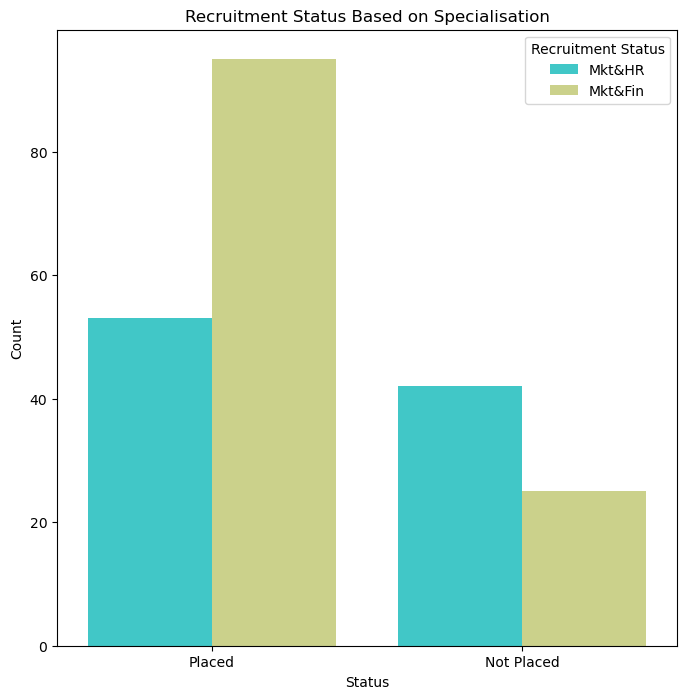

In [129]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
plt.figure(figsize=(8,8))
sns.countplot(x=df['status'], hue=df['specialisation'], data=df, palette='rainbow')
plt.title("Recruitment Status Based on Specialisation")
plt.xlabel("Status")
plt.ylabel("Count")
plt.legend(title="Recruitment Status", loc="upper right")
plt.show()


**Q:** Inteprete the above results.
> **A:**
1. Higher percentage of Marketing and Finance Students are placed for jobs than Marketing and HR students<br>
2. Not placing for a job percentage of Marketing and Finance stuents also higer than Marketing and HR students<br> 

c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

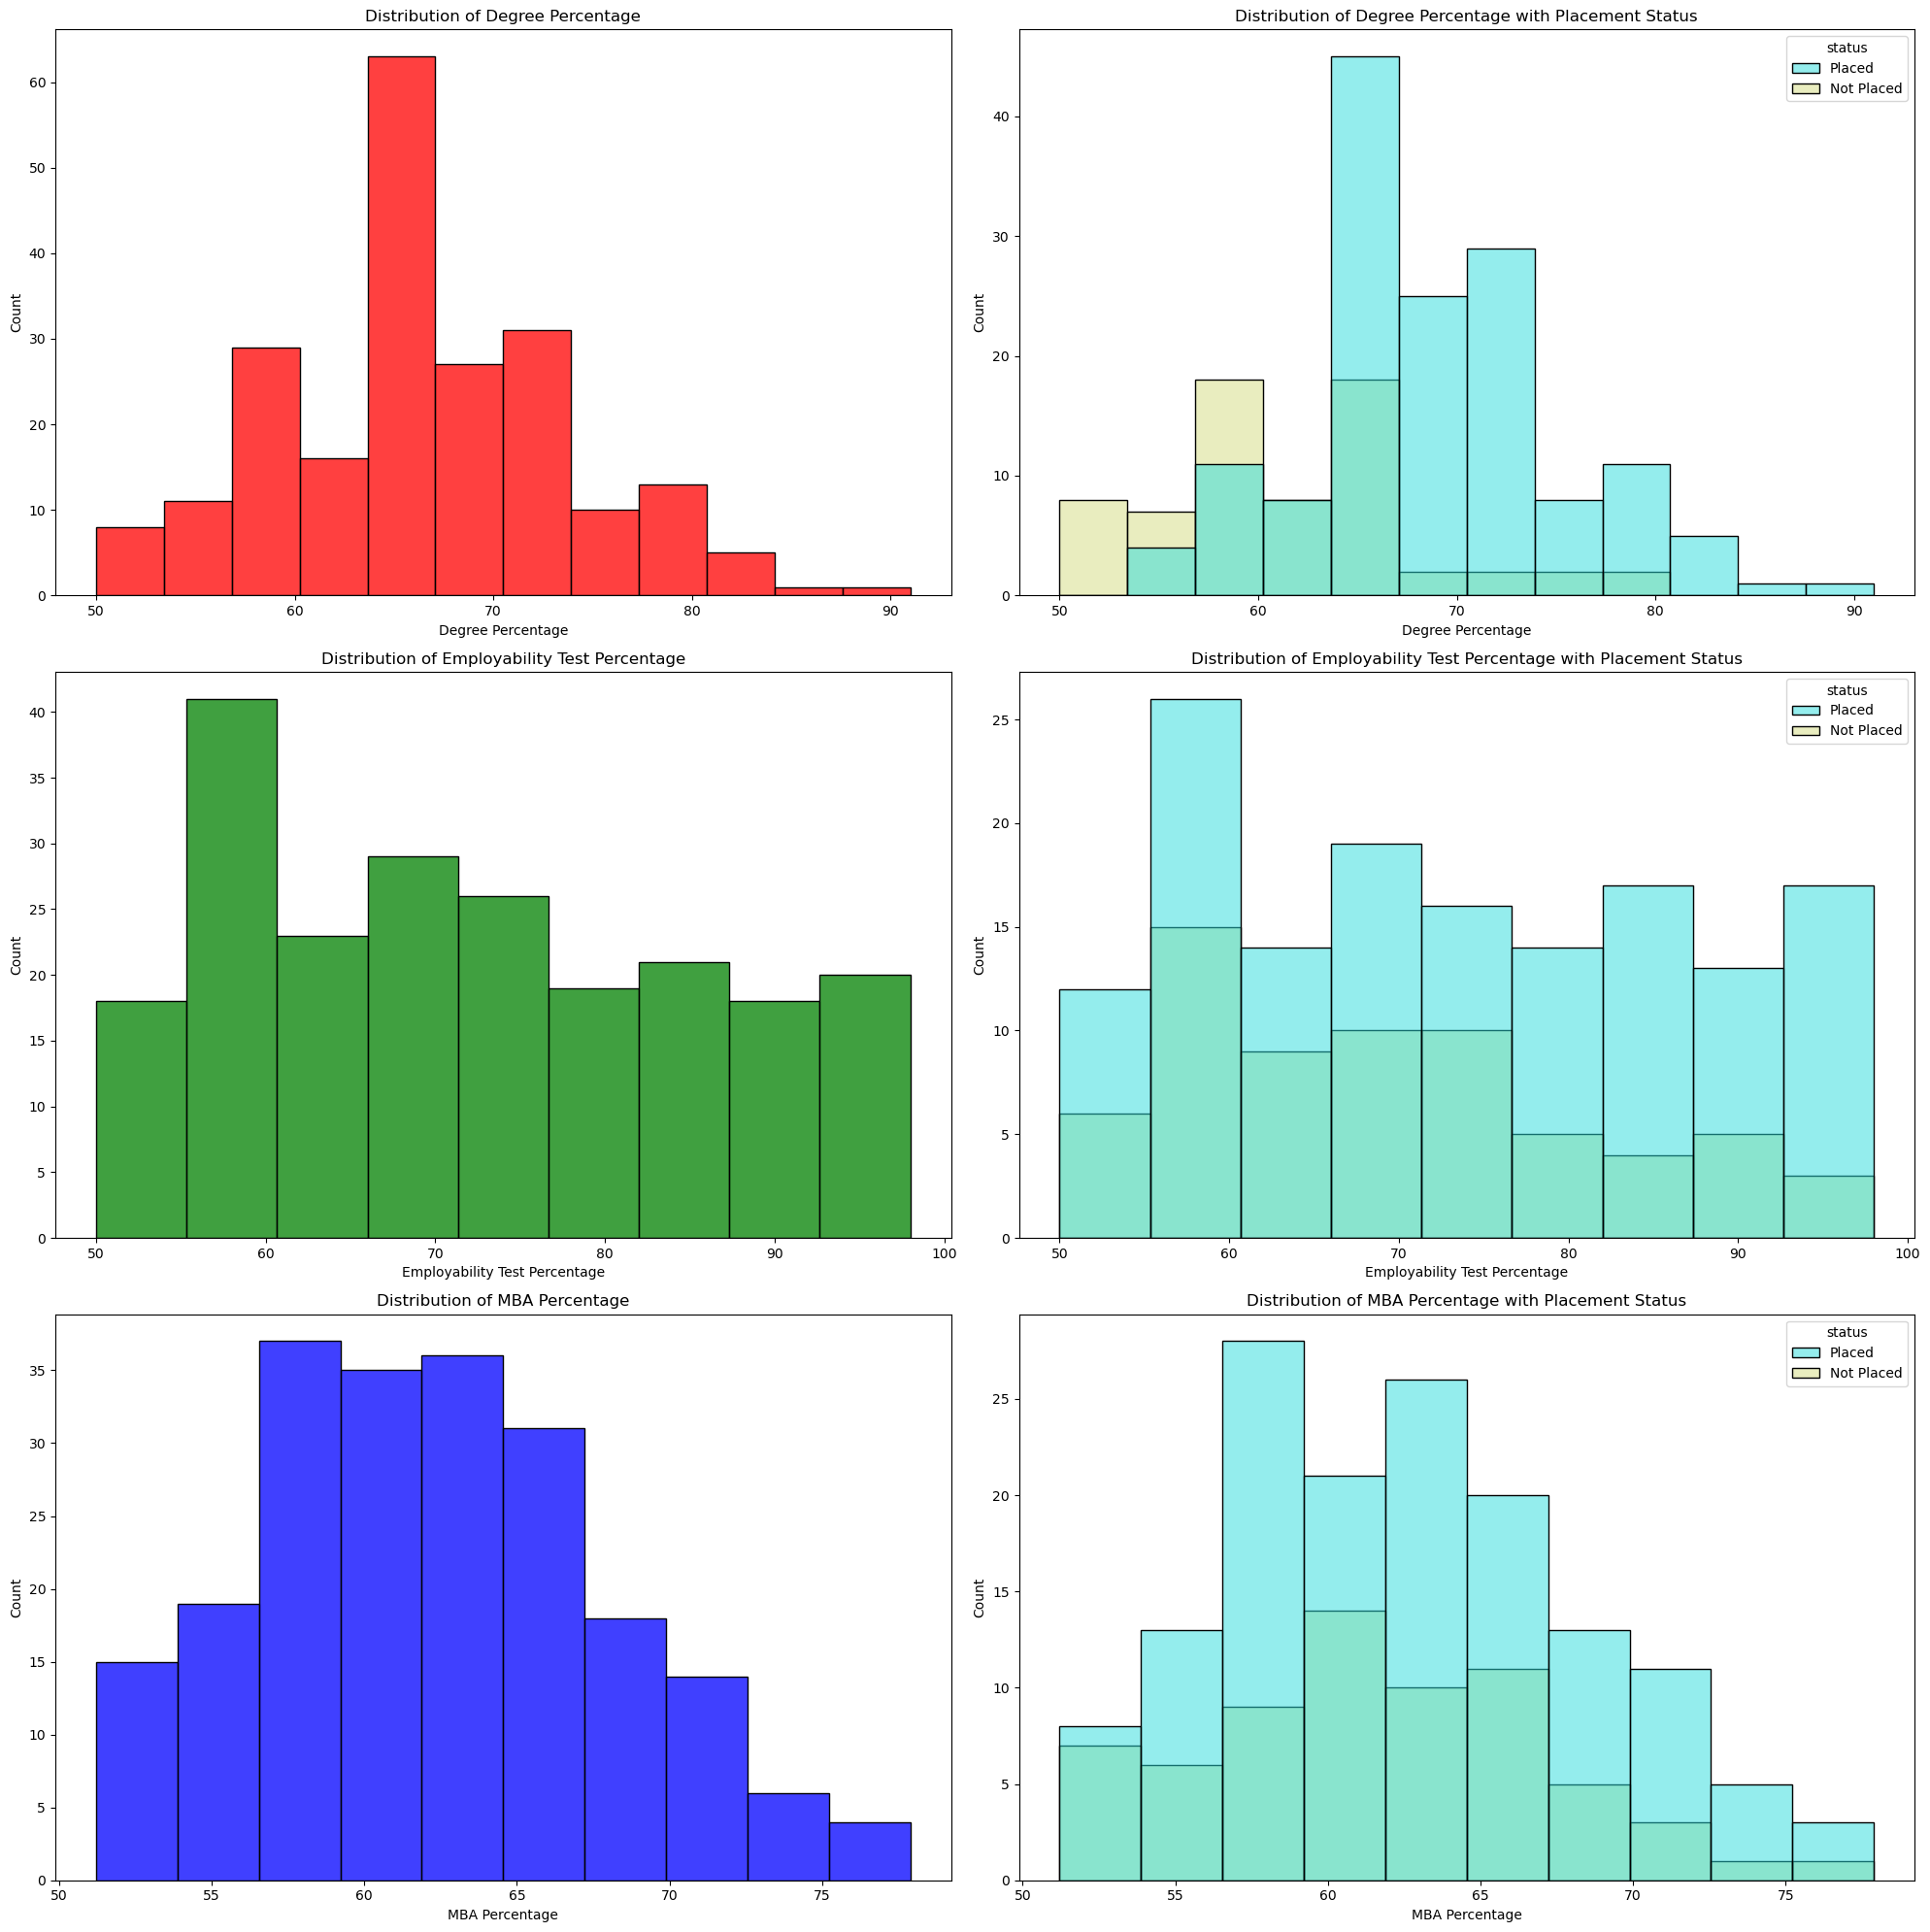

In [130]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
#add subplots on one column for these three histograms
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.histplot(x=df['degree_p'], data=df, color='red')
plt.title("Distribution of Degree Percentage")
plt.xlabel("Degree Percentage")
plt.ylabel("Count")
plt.subplot(3,2,3)
sns.histplot(x=df['etest_p'], data=df, color='green')
plt.title("Distribution of Employability Test Percentage")
plt.xlabel("Employability Test Percentage")
plt.ylabel("Count")
plt.subplot(3,2,5)
sns.histplot(x=df['mba_p'], data=df, color='blue')
plt.title("Distribution of MBA Percentage")
plt.xlabel("MBA Percentage")
plt.ylabel("Count")

# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
plt.subplot(3,2,2)
sns.histplot(x=df['degree_p'], hue=df['status'], data=df, palette='rainbow')
plt.title("Distribution of Degree Percentage with Placement Status")
plt.xlabel("Degree Percentage")
plt.ylabel("Count")
plt.subplot(3,2,4)
sns.histplot(x=df['etest_p'], hue=df['status'], data=df, palette='rainbow')
plt.title("Distribution of Employability Test Percentage with Placement Status")
plt.xlabel("Employability Test Percentage")
plt.ylabel("Count")
plt.subplot(3,2,6)
sns.histplot(x=df['mba_p'], hue=df['status'], data=df, palette='rainbow')
plt.title("Distribution of MBA Percentage with Placement Status")
plt.xlabel("MBA Percentage")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
# Make sure to plot the all six plots in the same figure.

# Your code goes here

**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**
Distribution of Degree Percentage:

The distribution of degree percentages is roughly symmetric with a peak around 65-70%. Most students fall within the range of 60-75%.
Distribution of Employability Test Percentage:

The employability test percentage shows a right-skewed distribution, indicating that a majority of students scored higher. There is a noticeable peak around 75-80%.
Distribution of MBA Percentage:

The distribution of MBA percentages appears roughly normal, with a peak around 60-65%. Most students fall within the range of 55-70%.

Distribution of Degree Percentage with Placement Status:

When considering placement status, the distribution of degree percentages for placed and not placed students is similar. However, placed students tend to have a slightly higher average degree percentage.

Distribution of Employability Test Percentage with Placement Status:

Placed students have higher employability test percentages on average compared to not placed students. The distribution for placed students has a peak around 80%, while not placed students have a broader distribution with a peak around 75%.

Distribution of MBA Percentage with Placement Status:

Placed students generally have higher MBA percentages, with a peak around 65%, compared to not placed students. The distribution for not placed students has a broader shape with a peak around 60%.

In [131]:
# Check for the null values in train set
x_train.isnull().sum()
# Your code goes here

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64

In [132]:
# Check for the null values in test set
x_test.isnull().sum()   
# Your code goes here

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64

<Axes: >

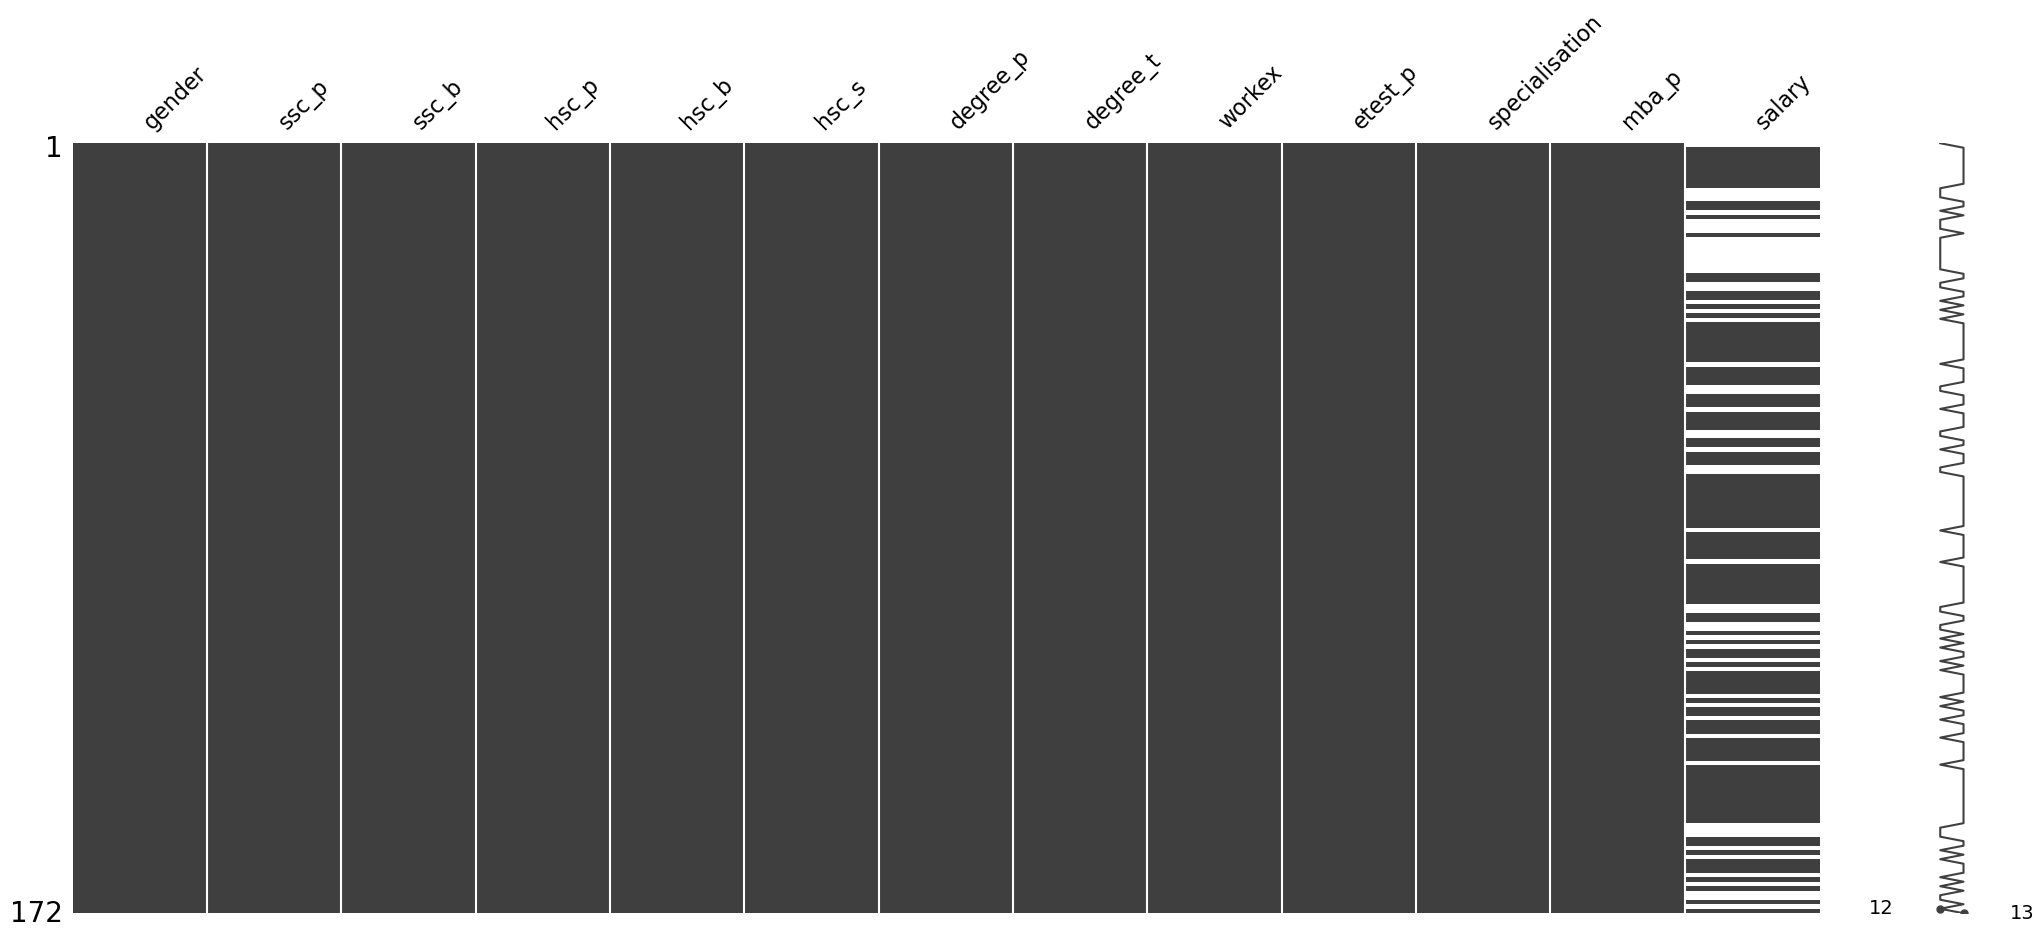

In [133]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
import missingno as msno
msno.matrix(x_train)

# Your code goes here

## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**
Best method in this data set for filling null values for salary column is mean/median/mode imputation because it is a numerical column. As the salary column has a skewed distribution and contains outliers, the median may be a more robust measure of central tendency. The median is less affected by extreme values compared to the mean.


In [134]:
# Handle the missing data
x_train['salary'].fillna(value=x_train['salary'].median(), inplace=True)


# Your code goes here

In [135]:
# Test the training dataset after processing the null values
x_train['salary'].isnull().sum()
# Your code goes here

0

<Axes: >

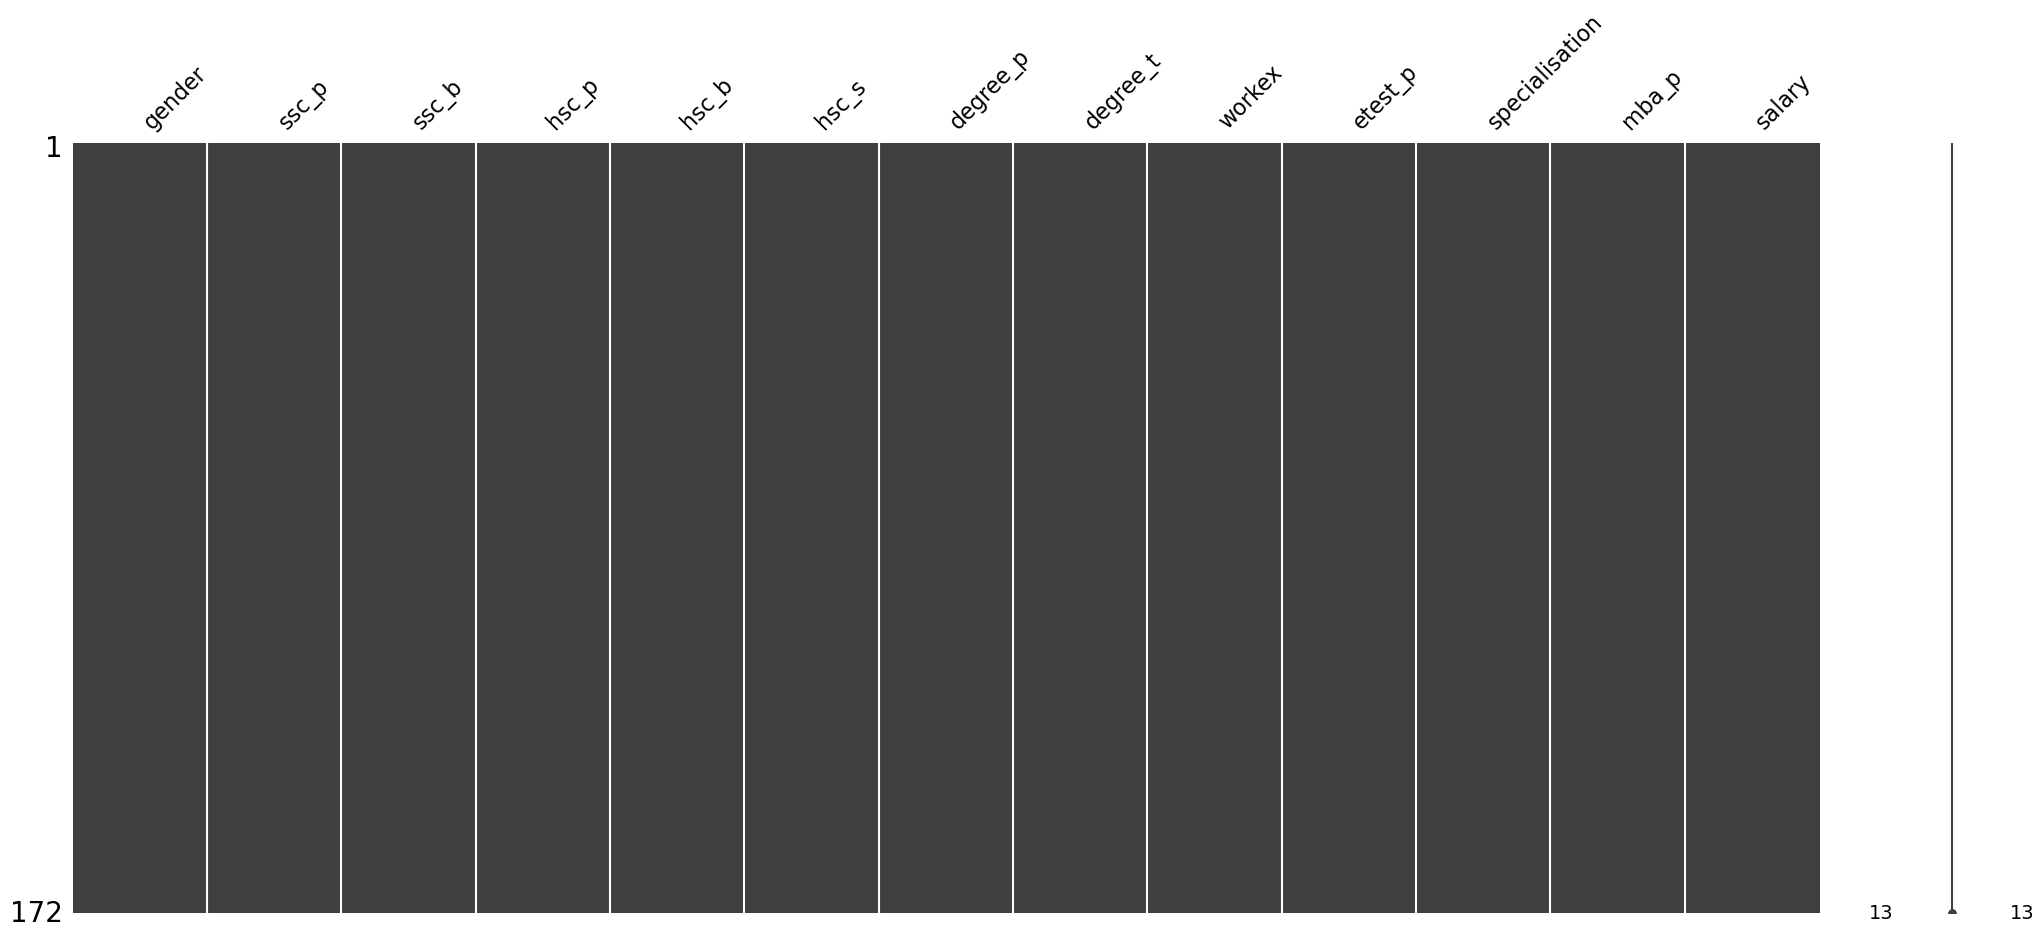

In [136]:
msno.matrix(x_train)

In [137]:
# Process the null values in the test set
x_test['salary'].fillna(value=x_test['salary'].median(),inplace=True)
# Your code goes here

In [138]:
# Test the testing dataset after processing the null values
x_test['salary'].isnull().sum()
# Your code goes here

0

### Handle the categorical features

In [139]:
df['degree_t'].value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

In [140]:
df['gender'].value_counts()

gender
M    139
F     76
Name: count, dtype: int64

In [141]:
df['hsc_b'].value_counts()

hsc_b
Others     131
Central     84
Name: count, dtype: int64

In [142]:
df['hsc_s'].value_counts()

hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64

In [143]:
df['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [144]:
df['workex'].value_counts()

workex
No     141
Yes     74
Name: count, dtype: int64

In [145]:
df['ssc_b'].value_counts()

ssc_b
Central    116
Others      99
Name: count, dtype: int64

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:** 
Label encoding is suitable for this because each categorical feature has specific classes of data


In [146]:
# Hint: Use Scikit-Learn library for the feature encoding
from sklearn.preprocessing import LabelEncoder

# List the categorical features
train_categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()


# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html
encoder = LabelEncoder()


# Encode the training features
for feature in train_categorical_features:
    x_train[feature] = encoder.fit_transform(x_train[feature])


# Your code goes here

In [147]:
# Check the datatypes of the the Pandas dataframe after the transformation
x_train.info()
# Your code goes here

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 93 to 102
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          172 non-null    int32  
 1   ssc_p           172 non-null    float64
 2   ssc_b           172 non-null    int32  
 3   hsc_p           172 non-null    float64
 4   hsc_b           172 non-null    int32  
 5   hsc_s           172 non-null    int32  
 6   degree_p        172 non-null    float64
 7   degree_t        172 non-null    int32  
 8   workex          172 non-null    int32  
 9   etest_p         172 non-null    float64
 10  specialisation  172 non-null    int32  
 11  mba_p           172 non-null    float64
 12  salary          172 non-null    float64
dtypes: float64(6), int32(7)
memory usage: 14.1 KB


In [148]:
# Encode the testing features
test_categorical_features = x_test.select_dtypes(include=['object']).columns.tolist()
for feature in test_categorical_features:
    x_test[feature] = encoder.fit_transform(x_test[feature])
# Your code goes here

In [149]:
# Encode the target variable in train and test sets
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
# Your code goes here

In [150]:
# Print the encoded labels for the training set
x_train[train_categorical_features]
# Your code goes here

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
93,1,0,0,1,0,0,1
84,1,0,1,2,2,1,0
95,1,0,1,1,0,1,0
137,1,1,0,1,0,0,1
210,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...
106,1,1,1,2,2,0,0
14,1,0,0,1,0,0,1
92,0,0,0,2,0,0,0
179,0,0,0,2,2,0,1


### Scale the Numerical Features

In [151]:
x_train.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,0.656977,67.144942,0.482558,66.058605,0.633721,1.343023,66.090930,0.587209,0.331395,72.684302,0.436047,62.227733,281947.674419
std,0.476105,10.890391,0.501155,11.490122,0.483194,0.596097,7.570122,0.884208,0.472089,13.371362,0.497341,5.936987,78556.439616
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,200000.000000
25%,0.000000,60.657500,0.000000,60.457500,0.000000,1.000000,60.675000,0.000000,0.000000,61.000000,0.000000,57.625000,250000.000000
50%,1.000000,67.000000,0.000000,64.945000,1.000000,1.000000,65.600000,0.000000,0.000000,71.600000,0.000000,62.070000,265000.000000
75%,1.000000,75.050000,1.000000,73.000000,1.000000,2.000000,71.232500,2.000000,1.000000,84.000000,1.000000,66.242500,281250.000000
max,1.000000,87.000000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,940000.000000


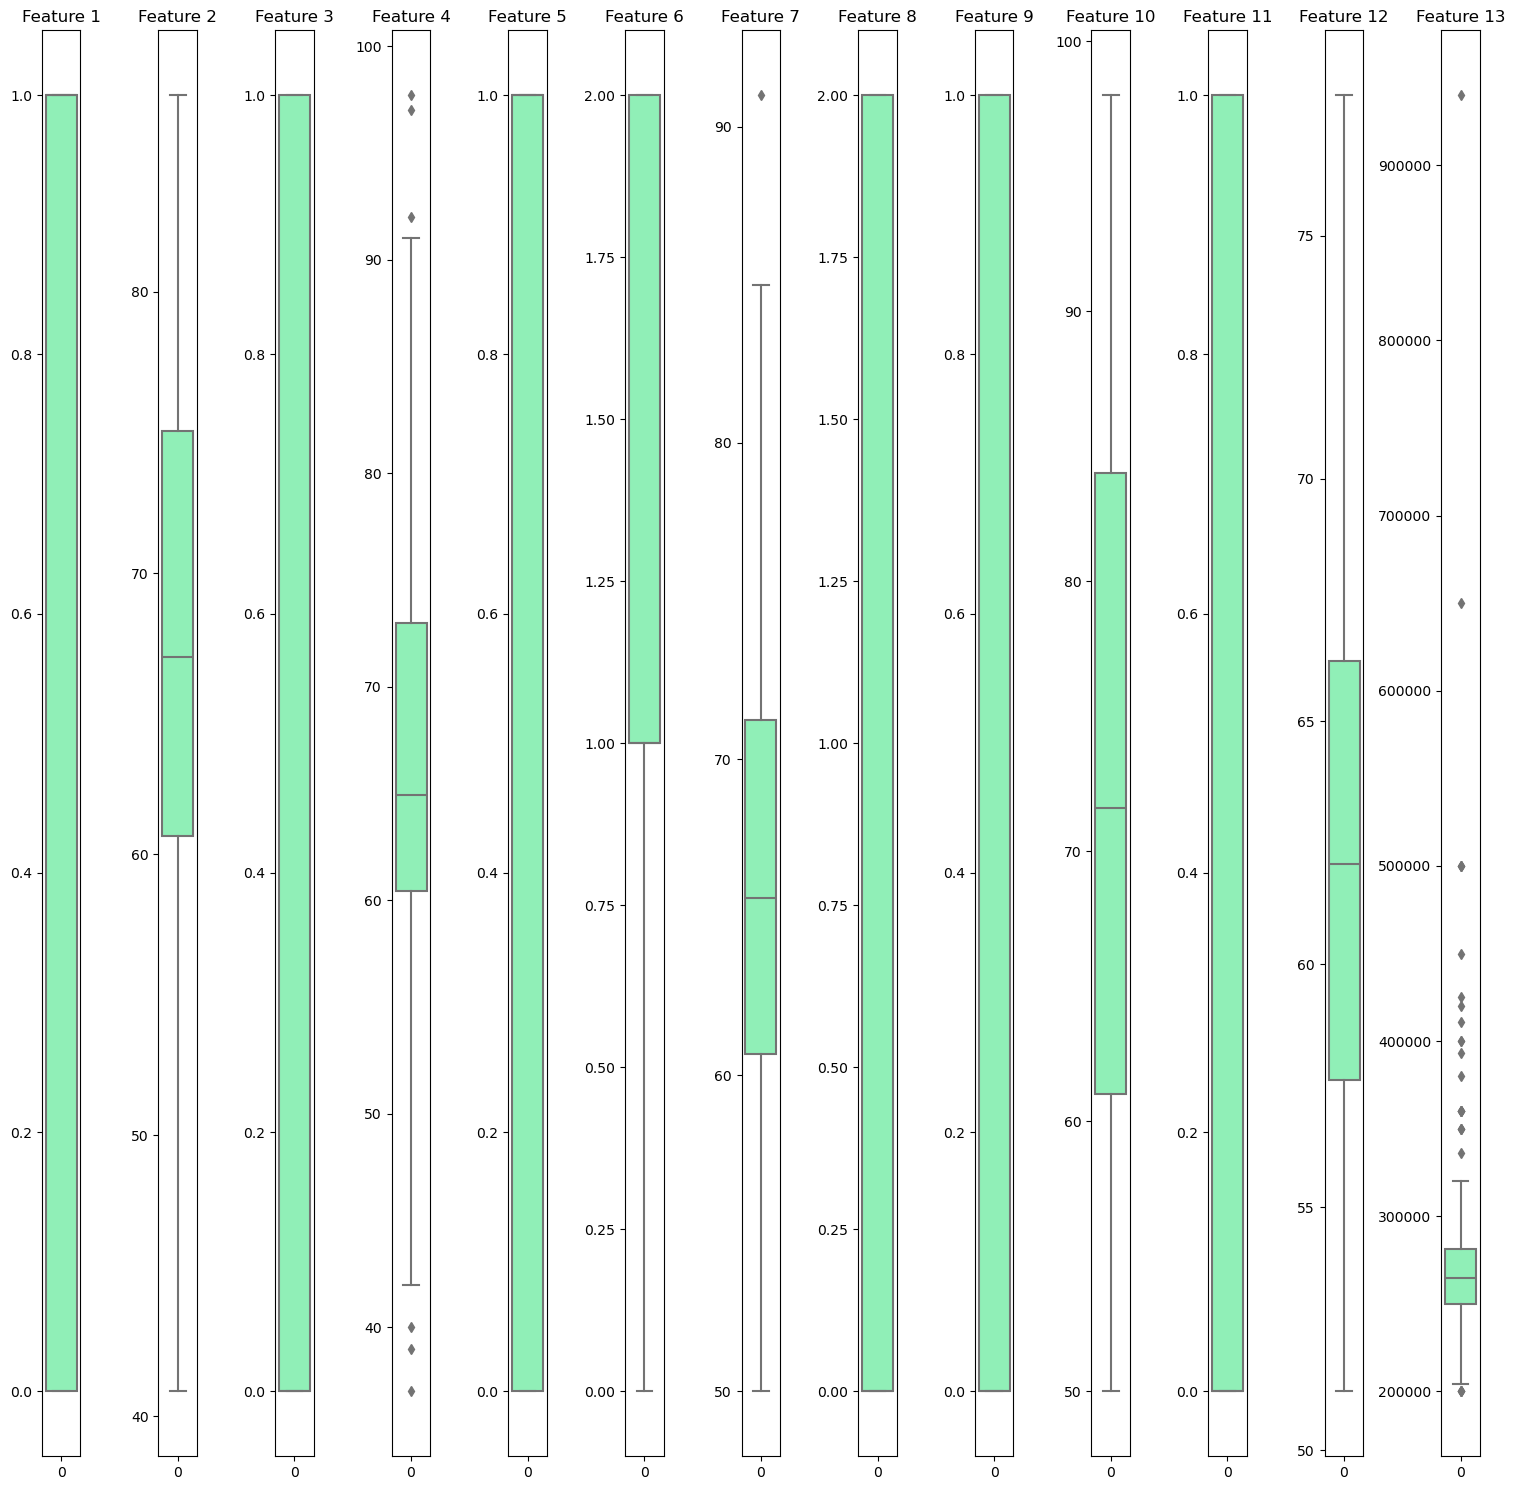

In [152]:
# draw box plots for each columns 

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed

for i in range(13):
    plt.subplot(1, 13, i + 1)
    sns.boxplot(x_train[x_train.columns[i]],palette='rainbow')
    plt.title(f'Feature {i + 1}')

plt.tight_layout()
plt.show()

In [153]:
from sklearn.cluster import DBSCAN

# DBSCAN algorithm outputs an array of cluster label >=0 or noise label = -1. -1 are the outliers
output = {}
dbscan = DBSCAN(eps=0.5, min_samples=5)
for feature in x_train.columns:
    outliers = dbscan.fit_predict(x_train[[feature]])
    outliers_count = len([x for x in outliers if x == -1])
    output[feature]=outliers_count
    
output

{'gender': 0,
 'ssc_p': 58,
 'ssc_b': 0,
 'hsc_p': 61,
 'hsc_b': 0,
 'hsc_s': 0,
 'degree_p': 39,
 'degree_t': 0,
 'workex': 0,
 'etest_p': 67,
 'specialisation': 0,
 'mba_p': 15,
 'salary': 54}

In [154]:
# Standard Scale the numerical features
## As the dataset has outliers standard scaling is more robust as min max scaling is sensitive to outliers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = x_train.select_dtypes(include=['float64']).columns.tolist()
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])


In [155]:
# Display the head of the scaled training set
x_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
93,1,-1.394730,0,-0.354257,0,1,-1.601854,0,0,-0.051326,1,-1.151702,-0.216369
84,1,0.262928,0,-0.266971,1,2,0.517889,2,1,-1.326412,0,-0.038470,0.230472
95,1,0.539205,0,1.042309,1,1,-0.144531,0,1,1.708292,0,-0.011442,1.762496
137,1,-0.013348,1,-0.266971,0,1,0.782857,0,0,-1.251407,1,-0.307065,-0.727043
210,1,1.239105,1,1.391451,1,1,1.524767,0,0,1.373770,0,2.071433,1.507158


In [156]:
# Display the head of the scaled testing set
x_test[numerical_features] = scaler.transform(x_test[numerical_features])
x_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
200,1,0.170836,1,-0.528828,1,0,-0.144531,0,0,1.115002,0,-1.590913,0.230472
212,1,-0.013348,1,0.082170,1,0,0.915341,0,1,-1.026392,0,1.265649,0.166637
138,0,1.368034,1,-0.179686,1,1,0.915341,2,1,1.748795,0,1.611950,-0.407872
176,0,-0.750085,0,-0.528828,1,0,-1.336886,0,0,-1.326412,1,-0.731073,-0.790878
15,0,-0.197532,0,0.780453,0,0,0.385405,0,1,-0.051326,0,0.410877,-1.046215


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**<br> SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It is one of the most popular oversampling techniques and it helps to overcome the imbalance problem by increasing the number of instances in the minority class.<br>
> **A2 (Advantage):**
1. <br> SMOTE does not create exact copies of observations, but creates new, synthetic, samples that are quite similar to the existing observations in the minority class.<br>
2. <br> SMOTE does not overfit the model as it does not create exact copies of observations, but creates new (but synthetic) observations.<br>
3. <br> SMOTE can be used to generate synthetic samples for both continuous and categorical attributes.<br>
4. <br> SMOTE can be used to generate synthetic samples for both continuous and categorical attributes.<br>
5. <br> SMOTE can be used to generate synthetic samples for both continuous and categorical attributes.<br>


In [157]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
from imblearn.over_sampling import SMOTE
x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train)

# Your code goes here

c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pathi\anaconda3\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

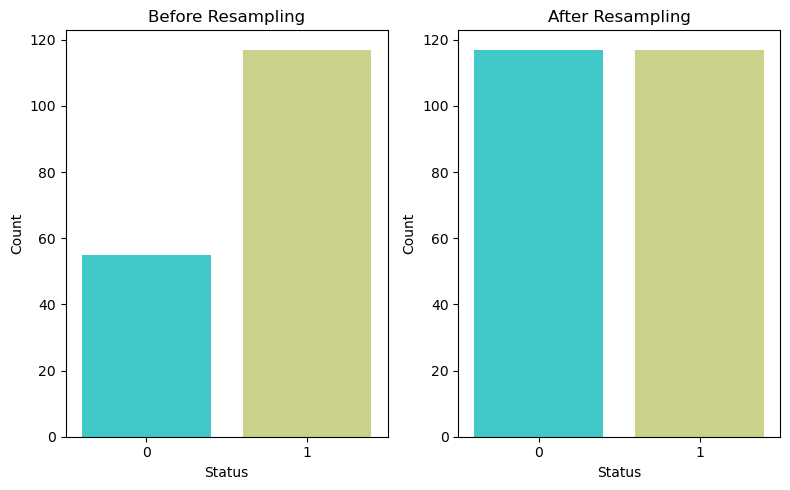

In [158]:
# plot the count plots side by side before and after resampling
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x=y_train, data=df, palette='rainbow')
plt.title("Before Resampling")
plt.xlabel("Status")
plt.ylabel("Count")
plt.subplot(1,2,2)
sns.countplot(x=y_train_resampled, data=df, palette='rainbow')
plt.title("After Resampling")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
# Your code goes here

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**
No. We should not oversample the test data set because It's important to maintain the integrity of the test set to ensure that the model's performance metrics provide a reliable estimate of how well it will generalize to new, unseen data.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [159]:
# Make sure you have loaded the necessary libaries here or in a point before
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline



# Your code goes here

In [160]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)
smote = SMOTE
svc = SVC
pipeline = Pipeline([('smote',smote),('svc',svc)])

# Your code goes here

In [161]:
# Define stratified k-fold cross validation with five folds
k_fold = KFold()
# Your code goes here

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**
Stratified K-Folds cross-validation is important because it ensures that each fold is representative of all strata of the data. This is important for imbalanced datasets because it ensures that each fold has the same class distribution as the original dataset.

In [162]:
# Define parameter grid with two to three hyper parameters to perform grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],'kernel': ['rbf', 'poly', 'sigmoid'],'degree': [1, 2, 3, 4, 5]}

In [163]:
# Define grid seach instance with GridSearchCV from Scikit-Learn
Model_SVC = SVC()
Grid_Search_SVC = GridSearchCV(Model_SVC,param_grid, refit=True, verbose=3)


In [164]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset
Grid_Search_SVC.fit(x_train, y_train)




Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.686 total time=   0.0s
[CV 2/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 4/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.676 total time=   0.0s
[CV 5/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.857 total time=   0.0s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.824 total time=   0.0s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.853 total time=   0.0s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.882 total time=   0.0s
[CV 1/5] END ...C=0.1, degree=1, kernel=sigmoid;, score=0.743 total time=   0.0s
[CV 2/5] END ...C=0.1, degree=1, kernel=sigmoid

[CV 2/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.771 total time=   0.0s
[CV 3/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 4/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 5/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 1/5] END .........C=1, degree=1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 2/5] END .........C=1, degree=1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 3/5] END .........C=1, degree=1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 4/5] END .........C=1, degree=1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 5/5] END .........C=1, degree=1, kernel=rbf;, score=0.882 total time=   0.0s
[CV 1/5] END ........C=1, degree=1, kernel=poly;, score=0.743 total time=   0.0s
[CV 2/5] END ........C=1, degree=1, kernel=poly;, score=0.914 total time=   0.0s
[CV 3/5] END ........C=1, degree=1, kernel=poly;, score=0.882 total time=   0.0s
[CV 4/5] END ........C=1, de

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [165]:
# Print the mean cross validated score of the best estimator (Accuracy)
from sklearn.model_selection import cross_val_score
cross_val_score(Grid_Search_SVC.best_estimator_,x_train, y_train, cv=k_fold, scoring='accuracy').mean()

0.8549579831932773

In [166]:
# Print the best hyper parameters detected from the grid search
print(Grid_Search_SVC.best_params_)


{'C': 10, 'degree': 1, 'kernel': 'poly'}


In [167]:
# Obtain the best estimator selected from the grid search
print(Grid_Search_SVC.best_estimator_)


SVC(C=10, degree=1, kernel='poly')


### Model Evaluation

In [168]:
# Fit the best estimator to the whole training dataset
best_fit = Grid_Search_SVC.best_estimator_.fit(x_train, y_train)


In [169]:
# Calculate the accuracy considering the complete traing set
y_train_pred = best_fit.predict(x_train)
training_score = accuracy_score(y_train, y_train_pred)
print(training_score)


0.9186046511627907


In [170]:
# Calculate the accuracy for the test set
y_test_pred = best_fit.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)


0.9069767441860465


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**
Model is not overfitting because the accuracy of the model is consistent across all folds. The model has a high accuracy, which indicates that it is performing well on the test set.

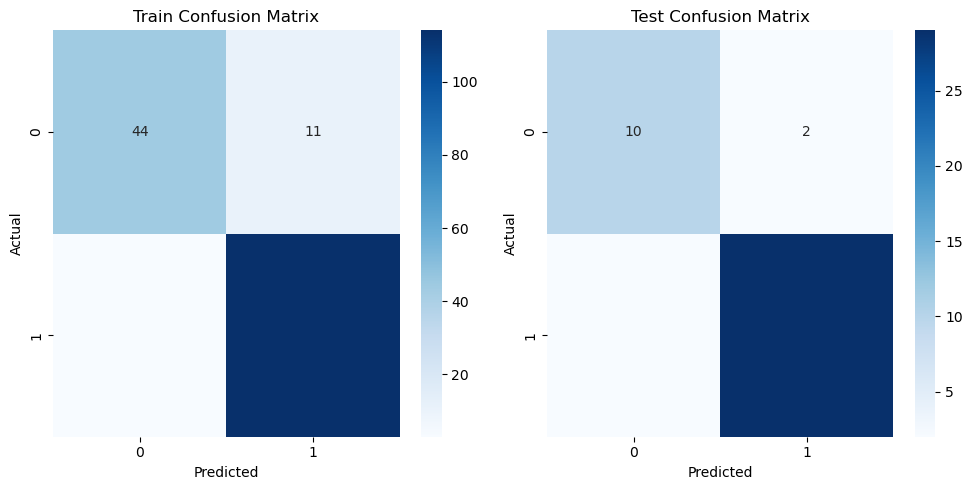

In [171]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(train_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1,2,2)
sns.heatmap(test_conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


**Q:** Comment about the obtained confusion matrices. <br>
> **A:**
Confusion matrices show that the model has a high true positive rate and a low false positive rate. This indicates that the model is performing well in predicting the positive class (placed students).


In [172]:
# Generate the classification report from Scikit-Learn for the test set
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print(report)


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.94      0.94      0.94        31

    accuracy                           0.91        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.91      0.91      0.91        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**
Precision of placed 0.94 and not placed 0.83 Recall of placed 0.94 and not placed 0.83 F1-score of placed 0.94 and not placed 0.83 Support of placed 0.94 and not placed 0.83 Accuracy of placed 0.94 and not placed 0.83 Macro avg 0.94 and not placed 0.83 Weighted avg 0.94 and not placed 0.83 The classification report provides a summary of the model's performance on the test set. It includes precision, recall, F1-score, and support for each class. Precision is the ratio of true positive to the sum of true positive and false positive. Recall is the ratio of true positive to the sum of true positive and false negative. F1-score is the harmonic mean of precision and recall. Support is the number of actual occurrences of the class in the specified dataset. The classification report also includes accuracy, macro avg, and weighted avg. Accuracy is the ratio of correctly predicted observation to the total observations. Macro avg is the average of precision, recall, and F1-score for each class. Weighted avg is the weighted average of precision, recall, and F1-score for each class, with the number of true instances for each class as the weight.

0.8844086021505377


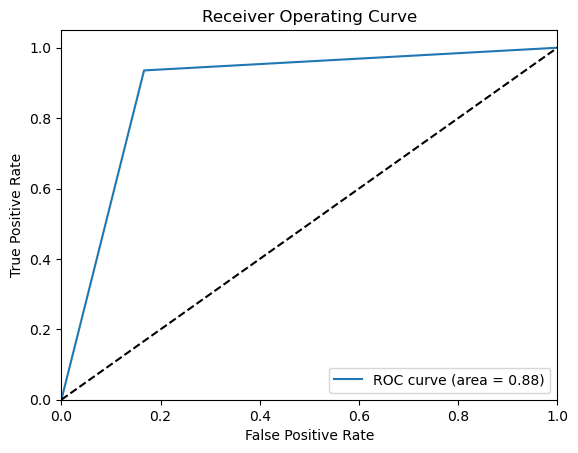

0.8844086021505377


In [173]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
ROC =   roc_auc_score(y_test, y_test_pred)
print(ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % ROC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.legend(loc="lower right")
plt.show()

Area_Under_Curve = roc_auc_score(y_test, y_test_pred)
print(Area_Under_Curve)



**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**
AUC value is 0.88. The ROC curve is a graphical representation of the true positive rate (sensitivity) versus the false positive rate (1-specificity). The AUC value is the area under the ROC curve. The AUC value is a measure of how well the model can distinguish between the positive and negative classes. The AUC value of 0.88 indicates that the model is able to distinguish between the positive and negative classes with high accuracy. The ROC curve shows that the model has a high true positive rate and a low false positive rate, which indicates that the model is performing well in predicting the positive class (placed students).